import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



Here the dataset consists of 7 columns. The data is in clean form and there are no null values present. 

# DATA DESCRIPTION 

In [76]:
import pandas as pd
df = pd.read_csv('../input/global-co2-emissions/CO2Emission_LifeExp.csv')
df.head()    # display the first 5 lines of the dataset

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
0,Afghanistan,AFG,9900004,7.13,0.28,35383032,63.763
1,Albania,ALB,5208319,4.45,1.80,2886438,78.194
2,Algeria,DZA,156220560,0.17,3.85,40551392,76.298
3,Angola,AGO,30566933,3.13,1.06,28842489,59.925
4,Anguilla,AIA,30262,1.52,2.10,14429,81.441


In [77]:
df.shape   # the dataset consists of 208 rows and 7 columns

(208, 7)

In [78]:
df.dtypes

Country            object
Code               object
CO2Emissions        int64
YearlyChange      float64
Percapita         float64
Population          int64
LifeExpectancy    float64
dtype: object

Check Missing Values

In [79]:
df[df.isnull()].count()   # there are no missing values

Country           0
Code              0
CO2Emissions      0
YearlyChange      0
Percapita         0
Population        0
LifeExpectancy    0
dtype: int64

In [80]:
df[df.duplicated()].count()  # there are no duplicate values

Country           0
Code              0
CO2Emissions      0
YearlyChange      0
Percapita         0
Population        0
LifeExpectancy    0
dtype: int64

In [81]:
col_name_without_numeric_data = list(df.select_dtypes(exclude=('int', 'float')).columns)
print(f'Сolumns without numeric data: {", ".join(col_name_without_numeric_data)}.')

Сolumns without numeric data: Country, Code.


In [82]:
# Check if spelling errors have been hit
for col in col_name_without_numeric_data:
    print(f'Before {col}: {len(set(df[col]))} After {col}: {len(set(df[col].str.title().str.strip()))}')

Before Country: 208 After Country: 208
Before Code: 208 After Code: 208


Thus there are no spelling mistakes as seen from above.

Here we try to answer the following questions.

1) Which country has the highest/lowest Co2 emissions ?
2) Which country has the highest/lowest per capita emission ?
3) Which country has the highest/lowest yearly change in the Co2 emissions ?
4) Which country has the highets/lowest life expectancy ?

In [83]:
df_sort1 = df.sort_values('CO2Emissions',ascending=False)
df_sort1

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
39,China,CHN,10432751400,-0.28,7.38,1414049351,76.210
198,United States,USA,5011686600,-2.01,15.52,323015995,78.885
88,India,IND,2533638100,4.71,1.91,1324517249,68.897
153,Russia,RUS,1661899300,-2.13,11.44,145275383,71.835
96,Japan,JPN,1239592060,-1.21,9.70,127763265,84.090
...,...,...,...,...,...,...,...
4,Anguilla,AIA,30262,1.52,2.10,14429,81.441
155,Saint Helena,SHN,13128,2.62,2.20,5956,80.251
158,Saint Pierre & Miquelon,SPM,8842,1.51,1.49,5934,80.654
62,Faeroe Islands,FRO,1953,0.60,0.04,48173,80.255


Thus the least emission of Co2 is by Greenland and the maximum emission is by China.

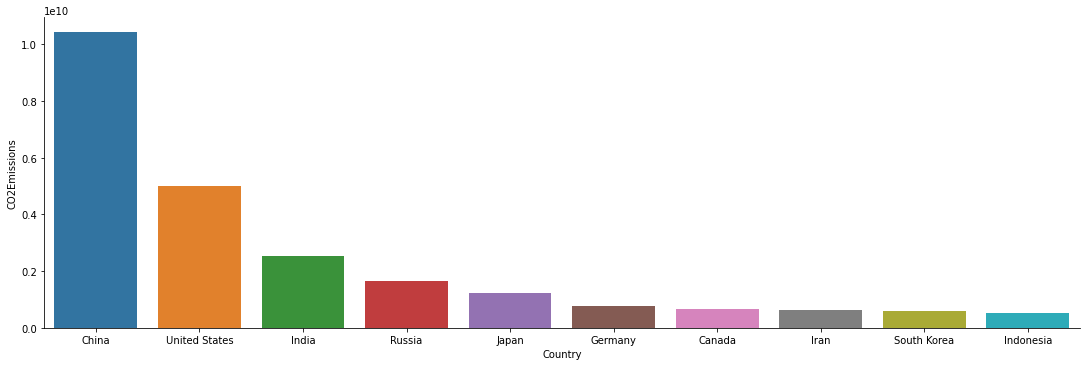

In [84]:
import seaborn as sns
sns.catplot(x="Country", y="CO2Emissions", kind="bar", data=df_sort1.head(10),height=5, aspect=27/9,)

These Counties have much higher population and are one of the most developed and fastest developing countries. They are one of the major contributors to the Co2 emissions in the atmosphere. While on the other hand for countries like Greenland, Feroe islands, most of them are islands and have much less population hence they have much less Co2 emissions.

Thus above plot shows top 10 countries with Co2 Emissions.

In [85]:
df_sort2 = df.sort_values('Population',ascending=False)
df_sort2

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
39,China,CHN,10432751400,-0.28,7.38,1414049351,76.210
88,India,IND,2533638100,4.71,1.91,1324517249,68.897
198,United States,USA,5011686600,-2.01,15.52,323015995,78.885
89,Indonesia,IDN,530035650,6.41,2.03,261556381,71.035
25,Brazil,BRA,462994920,-6.08,2.25,206163053,75.230
...,...,...,...,...,...,...,...
43,Cook Islands,COK,37354,7.19,2.13,17524,75.631
4,Anguilla,AIA,30262,1.52,2.10,14429,81.441
155,Saint Helena,SHN,13128,2.62,2.20,5956,80.251
158,Saint Pierre & Miquelon,SPM,8842,1.51,1.49,5934,80.654


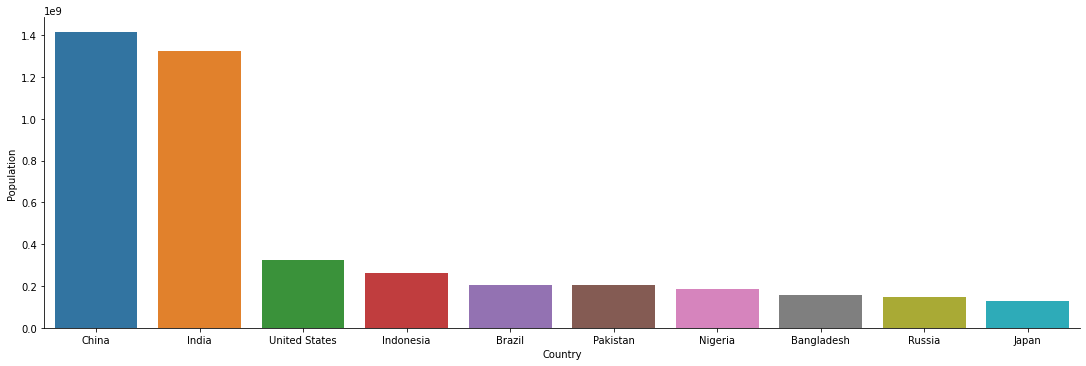

In [86]:
import seaborn as sns
sns.catplot(x="Country", y="Population", kind="bar", data=df_sort2.head(10),height=5, aspect=27/9,)

In [87]:
df_sort3 = df.sort_values('Percapita',ascending=False)
df_sort3

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
150,Qatar,QAT,98990085,1.79,37.29,2654374,79.868
124,Montenegro,MNE,16249039,2.27,25.90,627264,76.568
101,Kuwait,KWT,101492225,1.36,25.65,3956875,75.224
189,Trinidad and Tobago,TTO,34974263,-5.92,25.39,1377560,73.100
196,United Arab Emirates,ARE,218788684,4.43,23.37,9360980,77.470
...,...,...,...,...,...,...,...
134,Niger,NER,2088475,0.15,0.10,20788798,61.137
171,Somalia,SOM,1268442,2.57,0.09,14185636,56.324
116,Mali,MLI,1606421,2.57,0.09,17965443,57.987
62,Faeroe Islands,FRO,1953,0.60,0.04,48173,80.255


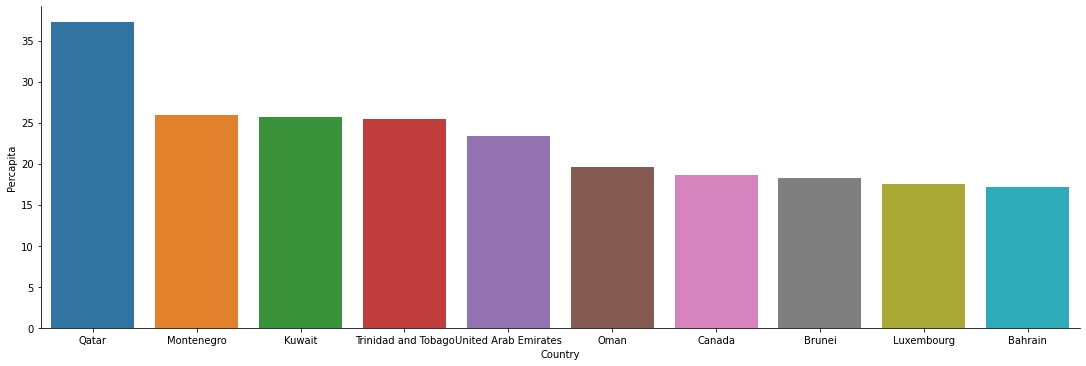

In [88]:
import seaborn as sns
sns.catplot(x="Country", y="Percapita", kind="bar", data=df_sort3.head(10),height=5, aspect=27/9,)

Thus by percapita comparision of country's Co2 emission we observe that it consists of major gulf countries which have much higher per-capita emission of Co2. They have lesser population but due to large amount of oil production by this countries they have much higher amount of PerCapita Emission.

In [89]:
df.sort_values('YearlyChange')

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
197,United Kingdom,GBR,367860350,-6.38,5.55,66297944,81.111
25,Brazil,BRA,462994920,-6.08,2.25,206163053,75.230
28,Bulgaria,BGR,50872910,-6.00,7.11,7151953,74.703
189,Trinidad and Tobago,TTO,34974263,-5.92,25.39,1377560,73.100
54,Ecuador,ECU,40065690,-4.85,2.43,16491116,76.365
...,...,...,...,...,...,...,...
140,Pakistan,PAK,178013820,9.13,0.87,203631353,66.770
129,Nepal,NPL,7833787,10.10,0.29,27263433,69.848
146,Philippines,PHL,126922662,12.37,1.22,103663816,70.802
123,Mongolia,MNG,18574260,18.09,6.08,3056364,69.321


The least yearly change in Co2 Emission is for United Kingdom while the highest change is obtained for North Korea.

The least per capita emission is by Greenand while the highest per capita emission is by Qatar.

In [90]:
df_sort4 = df.sort_values('LifeExpectancy',ascending = False)
df_sort4

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
85,Hong Kong,HKG,47066386,1.23,6.50,7243542,84.277
96,Japan,JPN,1239592060,-1.21,9.70,127763265,84.090
111,Macao,MAC,3106518,7.19,5.07,612836,83.854
35,Cayman Islands,CYM,406057,1.52,6.49,62569,83.480
180,Switzerland,CHE,39666930,-2.30,4.73,8379917,83.310
...,...,...,...,...,...,...,...
135,Nigeria,NGA,82634214,0.70,0.44,185960241,53.541
166,Sierra Leone,SLE,1272332,3.43,0.17,7328834,53.444
37,Chad,TCD,1670941,2.14,0.11,14561660,53.438
106,Lesotho,LSO,318438,2.58,0.15,2075030,52.059


The least life expectancy is at Central African Repubic while the highest is at Hongkong.

For the numeric values.

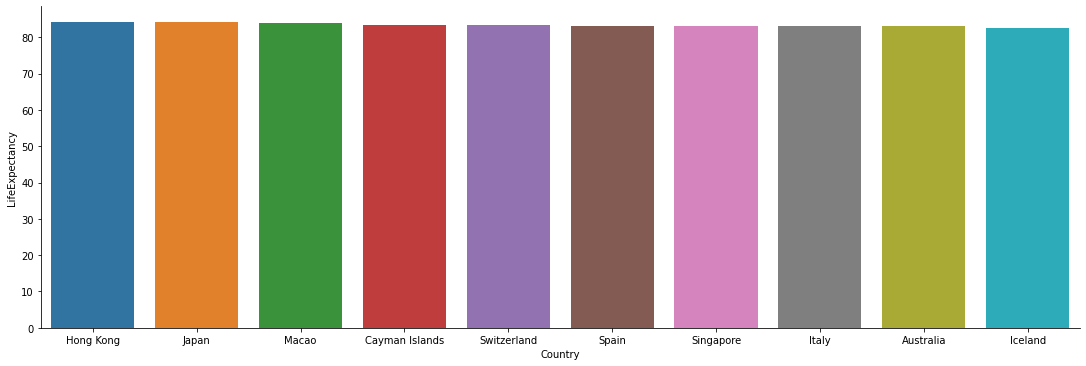

In [91]:
import seaborn as sns
sns.catplot(x="Country", y="LifeExpectancy", kind="bar", data=df_sort4.head(10),height=5, aspect=27/9,)

# Top Countries to have maximum reduction in Yearly Carbon Dioxide Emissions. 

In [92]:
df_sort5 = df.sort_values('YearlyChange',ascending = True)
df_sort5

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
197,United Kingdom,GBR,367860350,-6.38,5.55,66297944,81.111
25,Brazil,BRA,462994920,-6.08,2.25,206163053,75.230
28,Bulgaria,BGR,50872910,-6.00,7.11,7151953,74.703
189,Trinidad and Tobago,TTO,34974263,-5.92,25.39,1377560,73.100
54,Ecuador,ECU,40065690,-4.85,2.43,16491116,76.365
...,...,...,...,...,...,...,...
140,Pakistan,PAK,178013820,9.13,0.87,203631353,66.770
129,Nepal,NPL,7833787,10.10,0.29,27263433,69.848
146,Philippines,PHL,126922662,12.37,1.22,103663816,70.802
123,Mongolia,MNG,18574260,18.09,6.08,3056364,69.321


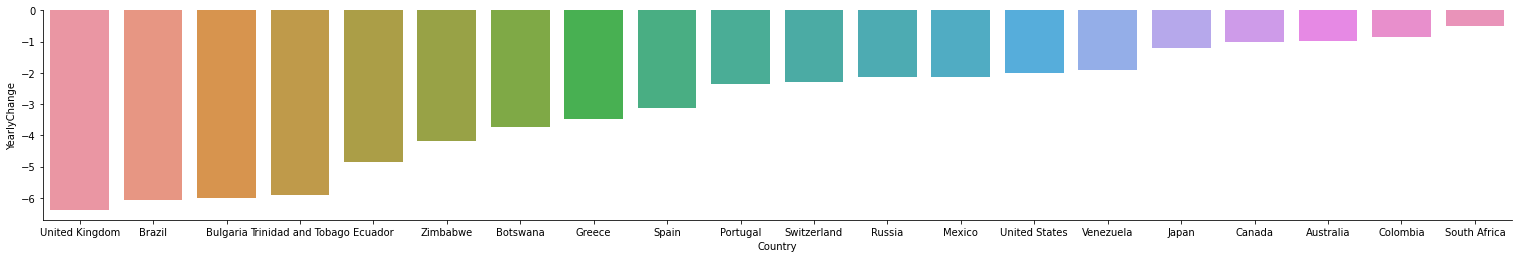

In [93]:
import seaborn as sns
sns.catplot(x="Country", y="YearlyChange", kind="bar", data=df_sort5.head(20),height=3.5, aspect=6,)

The major countries are form the European continent. Brazil is known for the Amazon forest that is posses which causes large amount of Co2 absorption form the atmosphere by the green belt. Most of this countries being the part of Paris Agreement have taken intensive measures to curb the emission of Co2 by large amount. USA though withdrawing from the Paris Agreement has still managed to reduce the emission of Co2 by significant amount.

It can be seen that the major developed countries have taken significant efforts in curbing the Co2 emission, however it can be assumed that the countries with good per capita emission have not taken up any measures as they are majorly the Oil producing countries with not much Infrastructure and Research backing for reducing the Co2 Emissions.

In [94]:
df.describe()

,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
count,2.080000e+02,208.000000,208.000000,2.080000e+02,208.000000
mean,1.661510e+08,2.586538,4.700577,3.547621e+07,72.699375
std,8.327638e+08,3.266324,5.735284,1.388659e+08,7.708037
min,1.530000e+03,-6.380000,0.030000,2.928000e+03,51.593000
25%,1.679310e+06,1.510000,0.690000,1.156140e+06,67.906250
50%,9.387305e+06,2.215000,2.605000,6.998900e+06,74.301500
75%,5.969547e+07,3.605000,6.415000,2.401059e+07,78.655250
max,1.043275e+10,19.490000,37.290000,1.414049e+09,84.277000


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb4519a5310>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb4519a5b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb451999e10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb4519b0490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb4519b08d0>],
 'means': []}

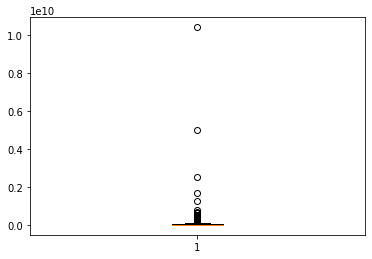

In [95]:
import matplotlib.pyplot
matplotlib.pyplot.boxplot(df['CO2Emissions'], notch=None, vert=None, patch_artist=None, widths=None)   #Visualisation through Box plot for Co2 Emissions 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb451925150>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb451925950>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb45191dc10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb451931250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb451931690>],
 'means': []}

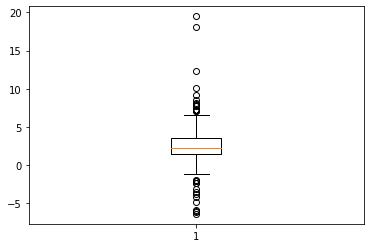

In [96]:
matplotlib.pyplot.boxplot(df['YearlyChange'], notch=None, vert=None, patch_artist=None, widths=None)   #Visualisation through Box plot for Yearly Change

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb4518a2810>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb4518ab0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb4518a2410>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb4518ab990>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb4518abdd0>],
 'means': []}

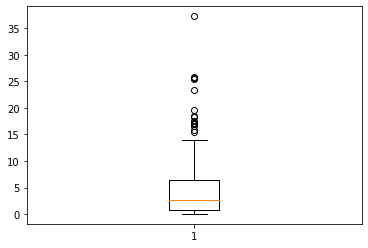

In [97]:
matplotlib.pyplot.boxplot(df['Percapita'], notch=None, vert=None, patch_artist=None, widths=None)   #Visualisation through Box plot for Yearly Change

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb45181bd90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb451823650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb45181b8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb451823f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb45182c390>],
 'means': []}

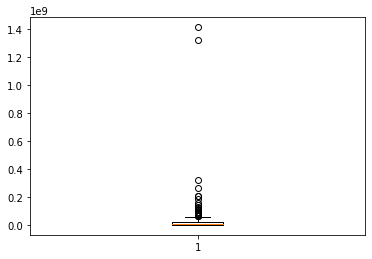

In [98]:
matplotlib.pyplot.boxplot(df['Population'], notch=None, vert=None, patch_artist=None, widths=None)   #Visualisation through Box plot for Yearly Change

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb4517a1650>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb4517a1e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb4517a1190>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb4517ab790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb4517abbd0>],
 'means': []}

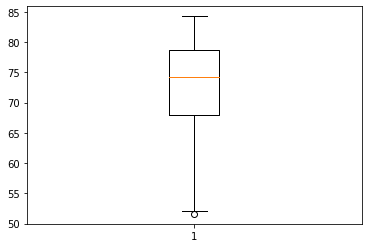

In [99]:
matplotlib.pyplot.boxplot(df['LifeExpectancy'], notch=None, vert=None, patch_artist=None, widths=None)   #Visualisation through Box plot for Yearly Change

Conclusion:
Here none of the above plots are normally distributed and they all are asymmetric.

INSIGHT: By analyzing the numeric data, it is established:

Co2 Emissions:

Data is not distributed normally. Asymmetry is observed.
Average and median book ratings are 1.66 x 10^8.
There are outliers in the data. There are a small number of books in the data above the 9.3 x 10^6 rating which is the 50 percentile.

YearlyChange:

Data is not distributed normally. Asymmetry is observed.
The data has a wide range.
There are many outliers in the data. There are a small number of countries whose annual change in emissions is above the 75 percentile.

Per Capita:

The mean of the data is around 4.77
Data is not distributed normally. Asymmetry is observed.
There are countries that have much higher than the average amount of per capita emission, as well as countries with as low per capita emssion as 0.03.There are countries that have much higher than the average per capita emission as high as 37. This happens because a large variation in the population size of the countries considered.

Population:

75% of countries have a population of 7.5 x 10^7. While there are some outliers present which have much higher population compared to the other countries. Again it is not normally distributed.

Life Expectancy:

Only 25% of the countries have a life expectancy of more than 78 years. 



We check upon the correlation if any.

In [100]:
df.corr()

,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
CO2Emissions,1.000000,-0.135395,0.140748,0.825624,0.092886
YearlyChange,-0.135395,1.000000,-0.220809,-0.038841,-0.175319
Percapita,0.140748,-0.220809,1.000000,-0.000769,0.477303
Population,0.825624,-0.038841,-0.000769,1.000000,-0.011464
LifeExpectancy,0.092886,-0.175319,0.477303,-0.011464,1.000000


Thus out of all CO2 emissions and Population have a strong positive correlation which can be justified as more popuated country lead to higher Co2 emissions. However there is a some positive relation

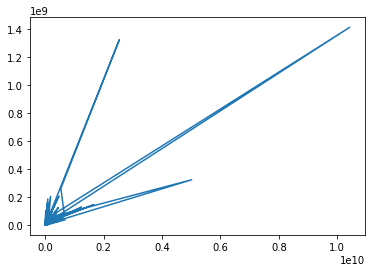

In [101]:
import matplotlib.pyplot as plt
plt.plot(df.CO2Emissions, df.Population)

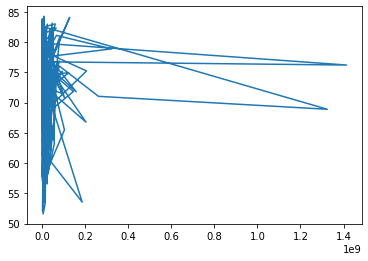

In [102]:
import matplotlib.pyplot as plt
plt.plot(df.Population, df.LifeExpectancy)

# Testing Hyposthesis

We check "Do Life Expectancy and Per Capita Emission are similar" ?

Let us have the Hypothesis as,

H0: There is no relation between Life Expectancy and Per Capita Emissions
H1: There is significant relation between Life Expectancy and Per Capita Emissions

In [103]:
from scipy.stats import ttest_ind
import numpy as np
ttest,pval = ttest_ind(df.LifeExpectancy,df.Percapita)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")


p-value 1.339547716242538e-295
we reject null hypothesis


Thus from the above Hypothesis testing it can be seen that there exists a relation between PerCapita Emission and Life Expectancy. As we reject the Null Hypothesis.

In [104]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Percapita ~ LifeExpectancy', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
LifeExpectancy,1551.200973,1.0,60.776447,3.118932e-13
Residual,5257.750557,206.0,NaN,NaN


Thus using ANOVA table we get p-value < 0.05 and we reject the null hypothesis such that Per-Capita Co2 Emissions have significant relation with LifeExpectancy. However there are other factors also which affect the life expectancy such as healthcare infrastructure, measures taken for curbing the emitted Co2, lifestyle, dieatry habits, standard of living and much more. Thus Life Expectancy depends on many such factors other than per capita emission. As we saw that Hongkong doesnt have one of the least Percapita Co2 emission but still has the highest life expectancy. In the same way Central African Republic has much less Percapita Co2 Emission but has the least LifeExpectancy. 

# Conclusion

Thus in the course of the analysis, it was established which countries emit the highest/least Percapita Emission of Co2, which countries have the most/least Yearly change in emission, which countires have the most/least Life Expectancy. In addition, it was found that Percapita Emission have a significant relation with Life Expectancy of countries, however it is not the only significant factor. As it depends on many other factors such as Health Infrastucture, measures taken for curbing the emitted Co2 and much more.

***Thank you for reading this work! Any feedback on this work would be very appreciated. If you liked this notebook, please put your votes. Thanks***